In [112]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [113]:
# just run 3 times each version - with and without inhibition


In [114]:
cd ~/code/pytorch-classification/

/home/amir/Dropbox/code/pytorch-classification


In [115]:
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [124]:
import os
# compare running with  / without lateral inhibition
epochs = 300
n_options = 0
names = []
perfs = []

for trial in range(5):
    for lateral in ['default','none']:#' random']:
        for let_inhibition_learn in [False,True]:
            for the_arch in ['dense','wrn']:
                for dataset in ['100','10']:

                    if lateral=='none' and let_inhibition_learn: 
                        # nothing to learn where there's no "inhibition"
                        continue 
                    n_options+=1

                    if the_arch == 'dense':
                        curOutDir = '/home/amir/checkpoints/cifar{}_inhibition/densenet-bc-100-12-IN_{}_IL_{}-run_{}'
                    elif the_arch == 'wrn':
                        curOutDir = '/home/amir/checkpoints/cifar{}_inhibition/wrn-28-10-IN_{}_IL_{}-run_{}'
                    else:
                        raise Exception('unsupported arch',the_arch)
                    curOutDir = curOutDir.format(dataset,lateral,let_inhibition_learn,trial)
                    ff = os.path.join(curOutDir,'log.txt')

                    if True and os.path.isfile(ff):
                        names.append('{}_{}_{}_{}'.format(lateral,let_inhibition_learn,trial,'cifar'+dataset))
                        p = []
                        #print lateral, let_inhibition_learn
                        lines = open(ff).readlines()
                        #print len(lines)
                        for k in lines[1:]:
                            #print k
                            p.append(float(k.split()[-1]))
                        perfs.append(p)
                        #print p[-1]
                        if len(lines)==epochs+1:
                            continue
                    if the_arch == 'dense':
                        cmd = 'python cifar.py -a densenet --depth 100 --growthRate 12\
                        --train-batch 64 --epochs {} --schedule 150 225 --wd 1e-4\
                        --gamma 0.1 --checkpoint {}\
                        --lateral-inhibition {} --learn-inhibition {} --dataset cifar{}'.format(epochs,curOutDir,lateral,
                                                                             let_inhibition_learn,dataset)
                    elif the_arch == 'wrn':

                        #python cifar.py -a wrn --depth 28 --depth 28 --widen-factor 10 --drop 0.3 --epochs 200 --schedule 60 120 160 --wd 5e-4 --gamma 0.2 --checkpoint checkpoints/cifar10/WRN-28-10-drop

                        cmd = 'python cifar.py -a wrn --depth 28 --widen-factor 10\
                        --drop 0.3 --epochs {} --schedule 60 120 260 --wd 5e-4\
                        --gamma 0.2 --checkpoint {}\
                        --lateral-inhibition {} --learn-inhibition {} --dataset cifar{} '.format(epochs,curOutDir,lateral,
                                                                             let_inhibition_learn,dataset)

                    print cmd
print n_options

python cifar.py -a densenet --depth 100 --growthRate 12                        --train-batch 64 --epochs 300 --schedule 150 225 --wd 1e-4                        --gamma 0.1 --checkpoint /home/amir/checkpoints/cifar10_inhibition/densenet-bc-100-12-IN_default_IL_False-run_0                        --lateral-inhibition default --learn-inhibition False --dataset cifar10
python cifar.py -a wrn --depth 28 --widen-factor 10                        --drop 0.3 --epochs 300 --schedule 60 120 260 --wd 5e-4                        --gamma 0.2 --checkpoint /home/amir/checkpoints/cifar100_inhibition/wrn-28-10-IN_default_IL_False-run_0                        --lateral-inhibition default --learn-inhibition False --dataset cifar100 
python cifar.py -a wrn --depth 28 --widen-factor 10                        --drop 0.3 --epochs 300 --schedule 60 120 260 --wd 5e-4                        --gamma 0.2 --checkpoint /home/amir/checkpoints/cifar10_inhibition/wrn-28-10-IN_default_IL_False-run_0                     

In [117]:
%pylab inline



Populating the interactive namespace from numpy and matplotlib


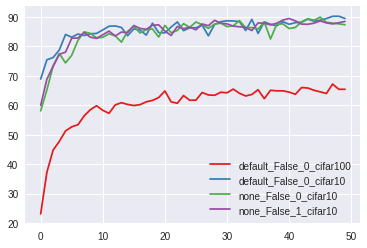

In [123]:
sns.set_palette(sns.color_palette("Set1"))
for n,p in zip(names,perfs):
    #p=np.maximum.accumulate(p)
    #if len(p) != epochs:
    #    continue
    z=0
    plot(p[z:z+50],label=n)
#ylim(90,96)
legend()

In [204]:
cmd

'python cifar.py -a densenet --depth 100 --growthRate 12        --train-batch 64 --epochs 10 --schedule 150 225 --wd 1e-4        --gamma 0.1 --checkpoint /home/amir/checkpoints/cifar10_inhibition/densenet-bc-100-12-IN_default-run_2        --lateral-inhibition default'

In [203]:
print curOutDir

/home/amir/checkpoints/cifar10_inhibition/densenet-bc-100-12-IN_default-run_2


In [199]:
cmd

'python cifar.py -a densenet --depth 100 --growthRate 12        --train-batch 64 --epochs 10 --schedule 150 225 --wd 1e-4        --gamma 0.1 --checkpoint default        --lateral-inhibition default'

In [110]:
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = z(X,Y)

In [98]:
Z = Z-Z.mean()

In [ ]:
# Let's define two gaussians.

In [94]:
Z.sum()

0.025671842599306084

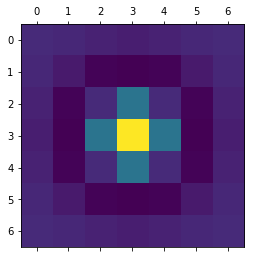

In [109]:
matshow(Z)

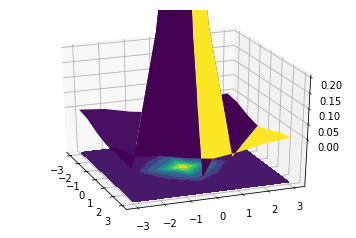

In [111]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
               cmap=cm.viridis)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

IndexError: too many indices for array

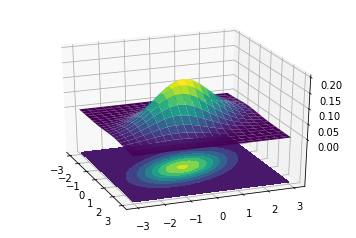

In [18]:
# import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [8]:
!mkdir ca_frames

0/400
10/400
20/400
30/400
40/400
50/400
60/400
70/400
80/400
90/400
100/400
110/400
120/400
130/400
140/400
150/400
160/400
170/400
180/400
190/400
200/400
210/400
220/400
230/400
240/400
250/400
260/400
270/400
280/400
290/400
300/400
310/400
320/400
330/400
340/400
350/400
360/400
370/400
380/400
390/400


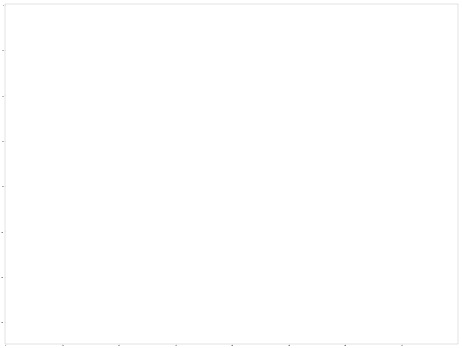

In [9]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def ca_step(X):
    """Evolve the maze by a single CA step."""

    K = np.ones((3, 3))
    n = convolve2d(X, K, mode='same', boundary='wrap') - X
    return (n == 3) | (X & ((n > 0) & (n < 6)))

# Maze size
nx, ny = 200, 150
X = np.zeros((ny, nx), dtype=np.bool)
# Size of initial random area (must be even numbers)
mx, my = 20, 16

# Initialize a patch with a random mx x my region
r = np.random.random((my, mx)) > 0.75
X[ny//2-my//2:ny//2+my//2, nx//2-mx//2:nx//2+mx//2] = r

# Total number of iterations
nit = 400
# Make an image every ipf iterations
ipf = 10

# Figure dimensions (pixels) and resolution (dpi)
width, height, dpi = 600, 450, 10
fig = plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
ax = fig.add_subplot(111)

for i in range(nit):
    X = ca_step(X)
    if not i % ipf:
        print('{}/{}'.format(i,nit))
        im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
        plt.axis('off')
        plt.savefig('ca_frames/_img{:04d}.png'.format(i), dpi=dpi)
        plt.cla()